About Dataset
The objective of the BRFSS is to collect uniform, state-specific data on preventive health practices and risk
behaviors that are linked to chronic diseases, injuries, and preventable infectious diseases in the adult population.
Factors assessed by the BRFSS include tobacco use, health care coverage, HIV/AIDS knowledge or prevention,
physical activity, and fruit and vegetable consumption. Data are collected from a random sample of adults (one per
household) through a telephone survey.

The Behavioral Risk Factor Surveillance System (BRFSS) is the nation's premier system of health-related telephone surveys that collect state data about U.S. residents regarding their health-related risk behaviors, chronic health conditions, and use of preventive services. Established in 1984 with 15 states, BRFSS now collects data in all 50 states as well as the District of Columbia and three U.S. territories. BRFSS completes more than 400,000 adult interviews each year, making it the largest continuously conducted health survey system in the world.

The Behavioral Risk Factor Surveillance System (BRFSS) is a health-related telephone survey that is collected annually by the CDC. Each year, the survey collects responses from over 400,000 Americans on health-related risk behaviors, chronic health conditions, and the use of preventative services. It has been conducted every year since 1984. For this project, a csv of the dataset available on Kaggle for the year 2015 was used. This original dataset contains responses from 441,455 individuals and has 330 features. These features are either questions directly asked of participants, or calculated variables based on individual participant responses.

In [1]:
# Necessary Libraries and Functions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report as rep
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset
diabetes _ binary _ 5050split _ health _ indicators _ BRFSS2015.csv is a clean dataset of 70,692 survey responses to the CDC's BRFSS2015. It has an equal 50-50 split of respondents with no diabetes and with either prediabetes or diabetes. The target variable Diabetes_binary has 2 classes. 0 is for no diabetes, and 1 is for prediabetes or diabetes. This dataset has 21 feature variables and is balanced.

In [2]:
#Loading the datase
df = pd.read_csv("D:\\Work\\data science course\\final\\diabetic\\diabetic2\\diabetes_binary_5050split_health_indicators_BRFSS2015.csv")
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [3]:
# summaries the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

In [4]:
df.shape

(70692, 22)

In [5]:
#check the data types , nulls ratio and no of categories
d_types = df.dtypes
nulls_ratio = df.isnull().sum()/df.shape[0]
n_unique = df.nunique()
pd.DataFrame({'DTypes': d_types, 'Null_Ratio': nulls_ratio, 'Nunique': n_unique}).T

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
DTypes,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,...,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
Null_Ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Nunique,2,2,2,2,80,2,2,2,2,2,...,2,2,5,31,31,2,2,13,6,8


In [6]:
#converting object datatype to category
cols = df.select_dtypes(include=["object"]).columns
df[cols] = df[cols].astype('category')
pd.DataFrame(df.dtypes).T


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,...,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64


In [7]:
# check , Drop or handle duplicates
print(f"Number of duplicate rows: {df.duplicated().sum()}")
df.drop_duplicates(inplace=True)

Number of duplicate rows: 1635


In [8]:
categorical_columns = df.select_dtypes('category').columns
numerical_columns = df.select_dtypes('number').columns
print(categorical_columns)
print(numerical_columns)

Index([], dtype='object')
Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')


In [9]:
df[numerical_columns].describe()


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,69057.000000,69057.000000,69057.000000,69057.000000,69057.000000,69057.000000,69057.000000,69057.000000,69057.000000,69057.000000,...,69057.000000,69057.000000,69057.000000,69057.000000,69057.000000,69057.000000,69057.000000,69057.000000,69057.000000,69057.000000
mean,0.508232,0.571224,0.531329,0.974803,29.955834,0.481935,0.063643,0.150875,0.696483,0.605659,...,0.953908,0.096138,2.863692,3.840103,5.945306,0.258612,0.456464,8.604037,4.900285,5.651332
std,0.499936,0.494905,0.499021,0.156723,7.147972,0.499677,0.244118,0.357930,0.459780,0.488712,...,0.209687,0.294782,1.107950,8.231164,10.139113,0.437875,0.498105,2.858284,1.029338,2.175608
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000
50%,1.000000,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,4.000000,3.000000,6.000000,1.000000,1.000000,11.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [10]:
# Identify all numerical (non-binary) features for outlier analysis
numerical_features = df.select_dtypes(include=["number"]).columns.tolist()

# Exclude binary features (0 or 1 values only)
binary_features = [col for col in numerical_features if df[col].nunique() == 2]
continuous_features = [col for col in numerical_features if col not in binary_features]
print(continuous_features)

['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income']


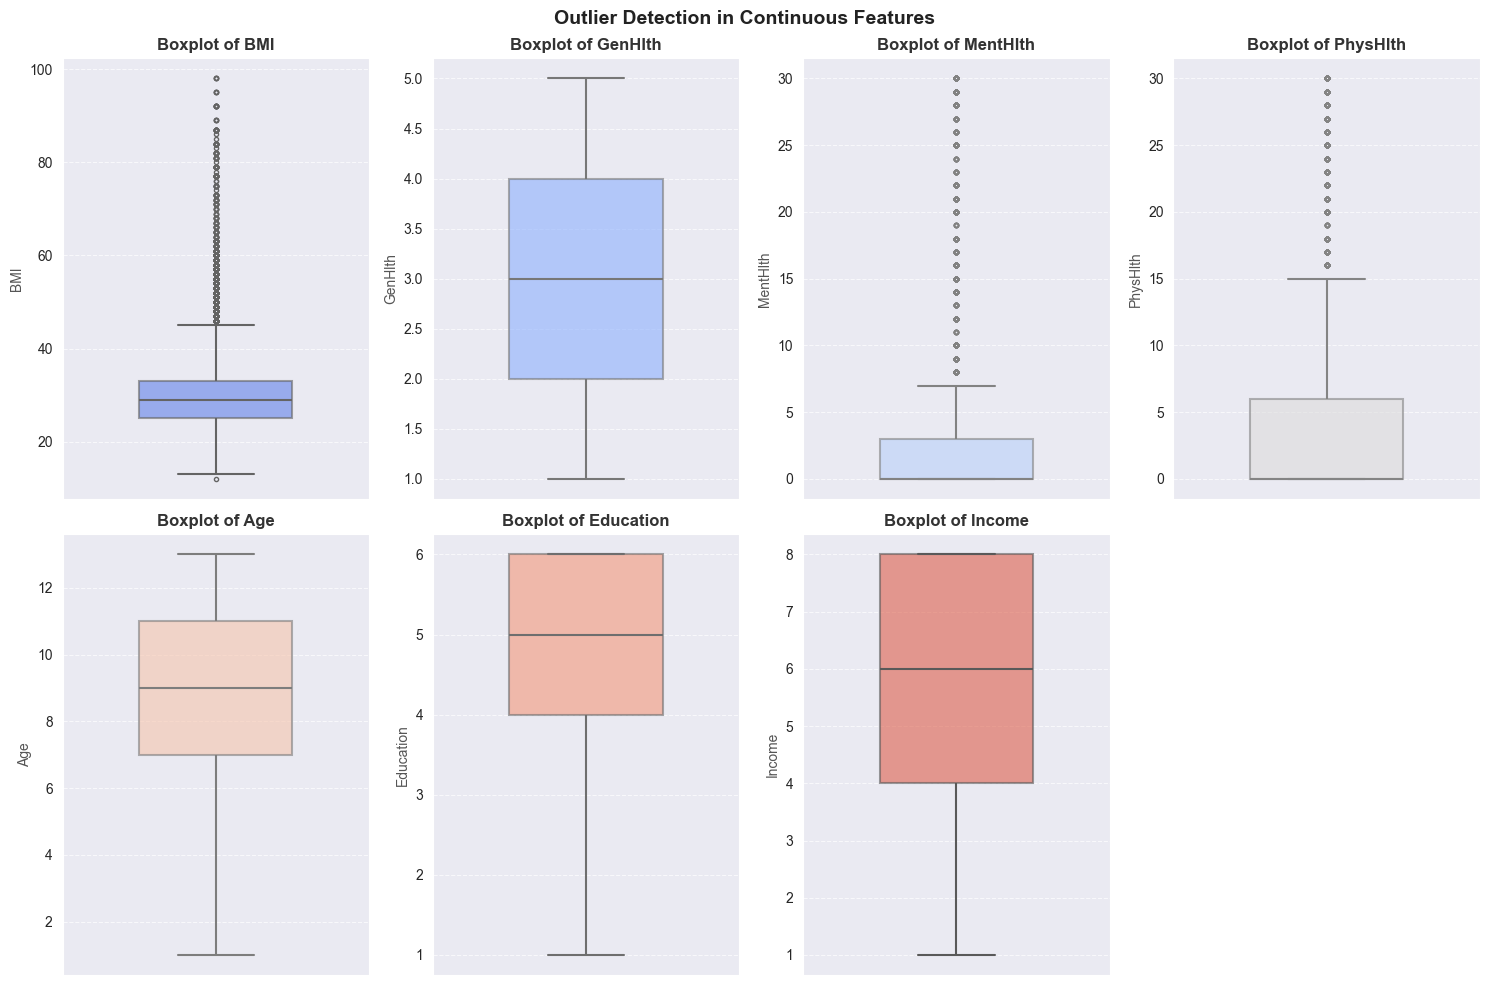

In [11]:
# Boxplot for detecting outliers for continuous columns

plt.figure(figsize=(15,10))
palette = sns.color_palette("coolwarm", len(continuous_features))  # Custom color palette

for i, feature in enumerate(continuous_features, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(y=df[feature], color=palette[i - 1], linewidth=1.5, fliersize=3, width=0.5,
                boxprops=dict(facecolor=palette[i - 1], alpha=0.6))

    # Custom styling
    plt.title(f"Boxplot of {feature}", fontsize=12, fontweight="bold", color="#333333")
    plt.ylabel(feature, fontsize=10, color="#555555")
    plt.grid(axis="y", linestyle="--", alpha=0.7)

# Improve layout
plt.suptitle("Outlier Detection in Continuous Features", fontsize=14, fontweight="bold", color="#222222")
plt.tight_layout()
plt.show()



In [12]:
#handle outliers
for column in continuous_features:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    print(Q1,Q3,IQR, lower_bound,upper_bound)
    df[column] = np.clip(df[column], lower_bound, upper_bound )


25.0 33.0 8.0 13.0 45.0
2.0 4.0 2.0 -1.0 7.0
0.0 3.0 3.0 -4.5 7.5
0.0 6.0 6.0 -9.0 15.0
7.0 11.0 4.0 1.0 17.0
4.0 6.0 2.0 1.0 9.0
4.0 8.0 4.0 -2.0 14.0


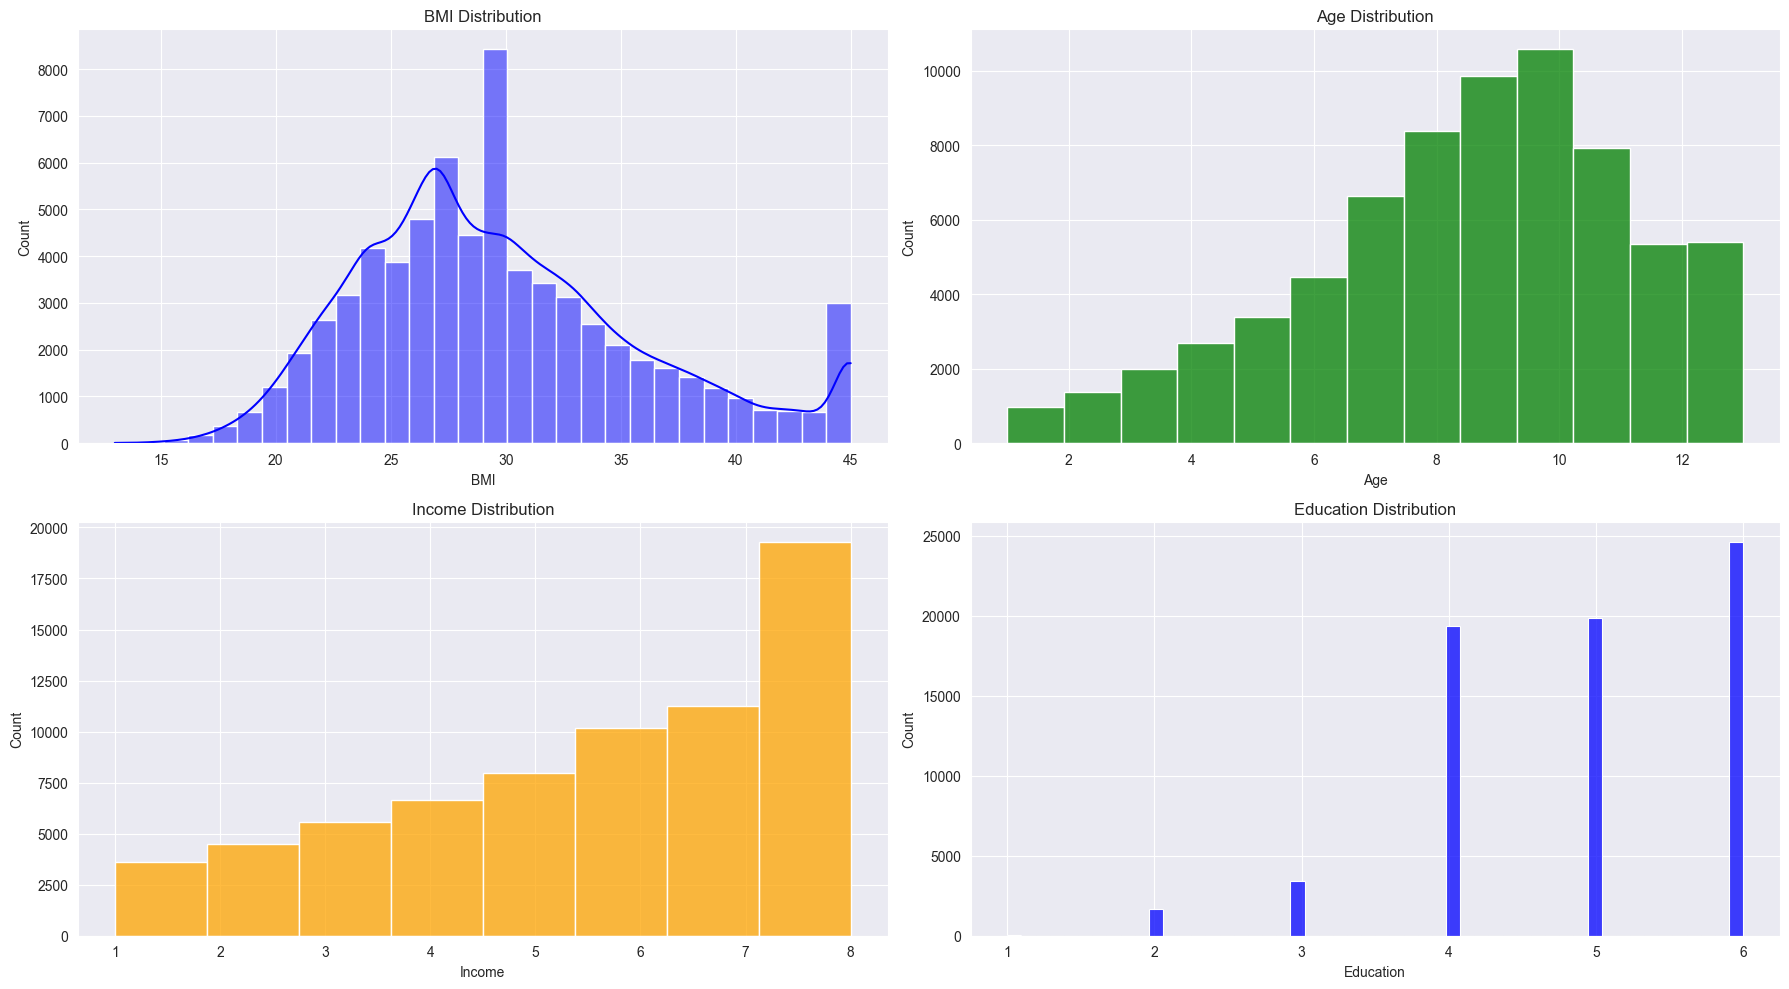

In [13]:
# Histograms for important features
# Set up subplots for distributions
fig, axes = plt.subplots(2, 2, figsize=(18, 10))

# BMI Distribution
sns.histplot(df["BMI"], bins=30, kde=True, ax=axes[0, 0], color="blue")
axes[0, 0].set_title("BMI Distribution")

# Age Distribution
sns.histplot(df["Age"], bins=13, kde=False, ax=axes[0, 1], color="green")
axes[0, 1].set_title("Age Distribution")

# Income Distribution
sns.histplot(df["Income"], bins=8, kde=False, ax=axes[1, 0], color="orange")
axes[1, 0].set_title("Income Distribution")

sns.histplot(df["Education"] ,ax=axes[1, 1], color="blue")
axes[1, 1].set_title("Education Distribution")

plt.tight_layout()
plt.show()

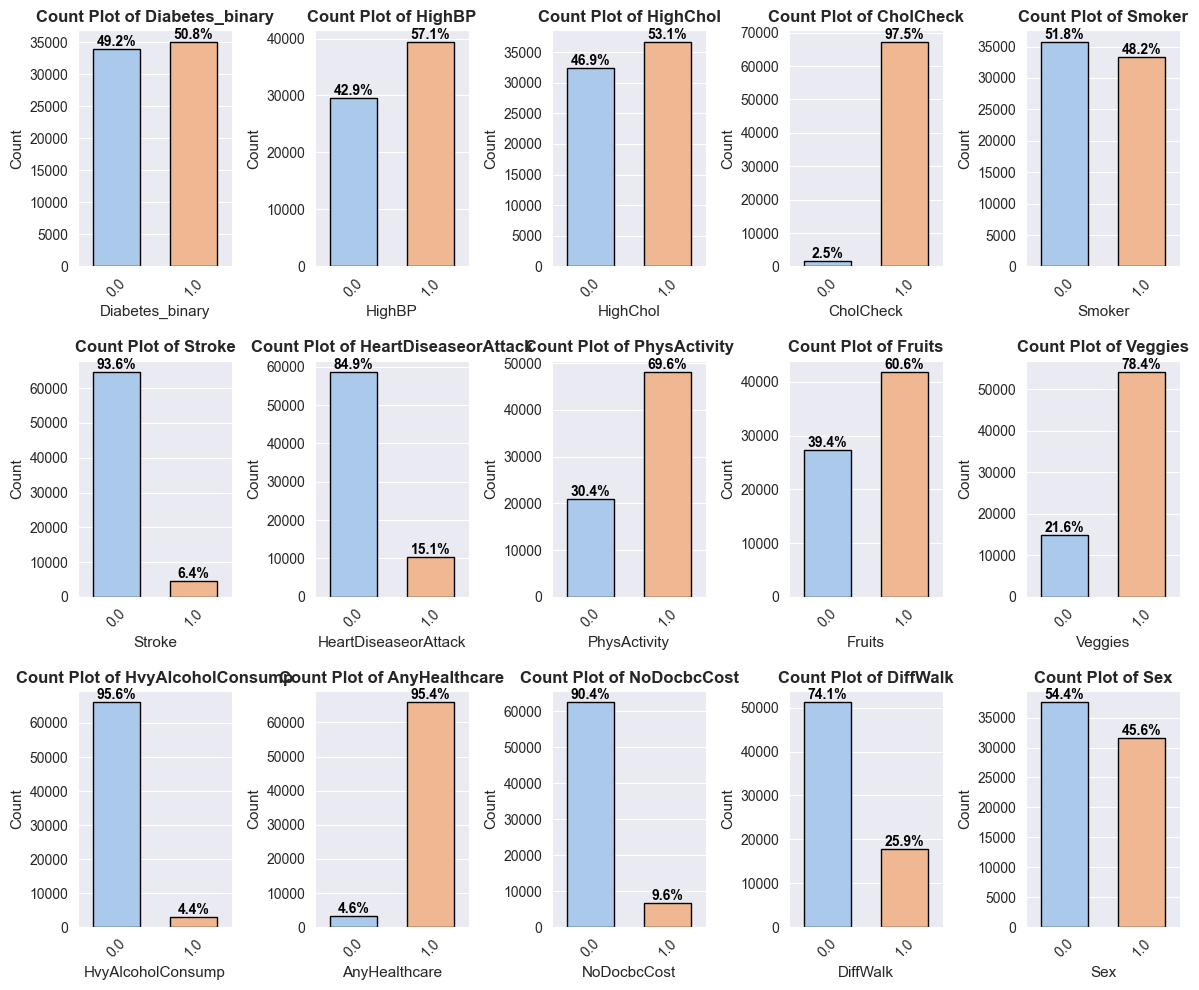

In [14]:
# Count plots for categorical(binary) features
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 10))  # Increase figure size for better spacing
total = len(df)  # Total number of rows

for i, col in enumerate(binary_features, 1):
    plt.subplot(3, 5, i)
    ax = sns.countplot(data=df, x=col, palette="pastel", edgecolor="black", width=0.6)  # Reduce bar width

    # Add percentage labels
    for p in ax.patches:
        count = p.get_height()
        if count > 0:  # Avoid annotating 0% bars
            percentage = f"{100 * count / total:.1f}%"
            ax.annotate(percentage,
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='bottom', fontsize=10, fontweight="bold", color="black")

    # Formatting
    plt.title(f"Count Plot of {col}", fontsize=12, fontweight="bold")
    plt.xticks(rotation=45)
    plt.xlabel(col, fontsize=11)
    plt.ylabel("Count", fontsize=11)

plt.tight_layout()  # Adjust layout
plt.subplots_adjust(hspace=0.4)  # Increase vertical spacing between subplots
plt.show()

'''A low-variance column is one that has little variation in its values across different rows. This typically means that most of the values in the column are the same, and it does not contribute much useful information for modeling.
'''

In [15]:
#Variance Threshold (Numerical Data)
from sklearn.feature_selection import VarianceThreshold

variance_threshold = 0.01  # Define your threshold
selector = VarianceThreshold(threshold=variance_threshold)
selector.fit(df[numerical_columns])
low_variance_numerical = numerical_columns[~selector.get_support()]

#Unique Value Ratio (Categorical Data)
categorical_threshold = 0.95 * len(df)  # More than 95% of values in one category
low_variance_categorical = [
    col for col in categorical_columns if df[col].value_counts().iloc[0] > categorical_threshold
]
print("Low-Variance Numerical Columns:", list(low_variance_numerical))
print("Low-Variance Categorical Columns:", list(low_variance_categorical))

dff = df.drop(columns=list(low_variance_numerical) + list(low_variance_categorical))


Low-Variance Numerical Columns: []
Low-Variance Categorical Columns: []


In [16]:
'''Correlation is a measure of the relationship between two or more variables, showing how they move together. It is quantified using a correlation coefficient (usually denoted as r), which ranges from -1 to +1:

.Positive correlation means both variables increase or decrease together.
.Negative correlation means one variable increases while the other decreases.
.No correlation means there is no clear relationship between the variables. Correlation is commonly used to understand how variables are related in datasets, and can be visualized using scatter plots or heatmaps.'''
print(df.corr())

                      Diabetes_binary    HighBP  HighChol  CholCheck  \
Diabetes_binary              1.000000  0.372048  0.281399   0.118900   
HighBP                       0.372048  1.000000  0.308987   0.106593   
HighChol                     0.281399  0.308987  1.000000   0.088231   
CholCheck                    0.118900  0.106593  0.088231   1.000000   
BMI                          0.309652  0.253400  0.137661   0.052757   
Smoker                       0.075853  0.078123  0.086522  -0.002854   
Stroke                       0.122727  0.126869  0.098166   0.023368   
HeartDiseaseorAttack         0.207229  0.206776  0.178207   0.044795   
PhysActivity                -0.150281 -0.128307 -0.084469  -0.010072   
Fruits                      -0.044560 -0.031818 -0.040783   0.015853   
Veggies                     -0.072181 -0.059824 -0.037801  -0.001040   
HvyAlcoholConsump           -0.098709 -0.029764 -0.027259  -0.026850   
AnyHealthcare                0.027034  0.039659  0.034352   0.10

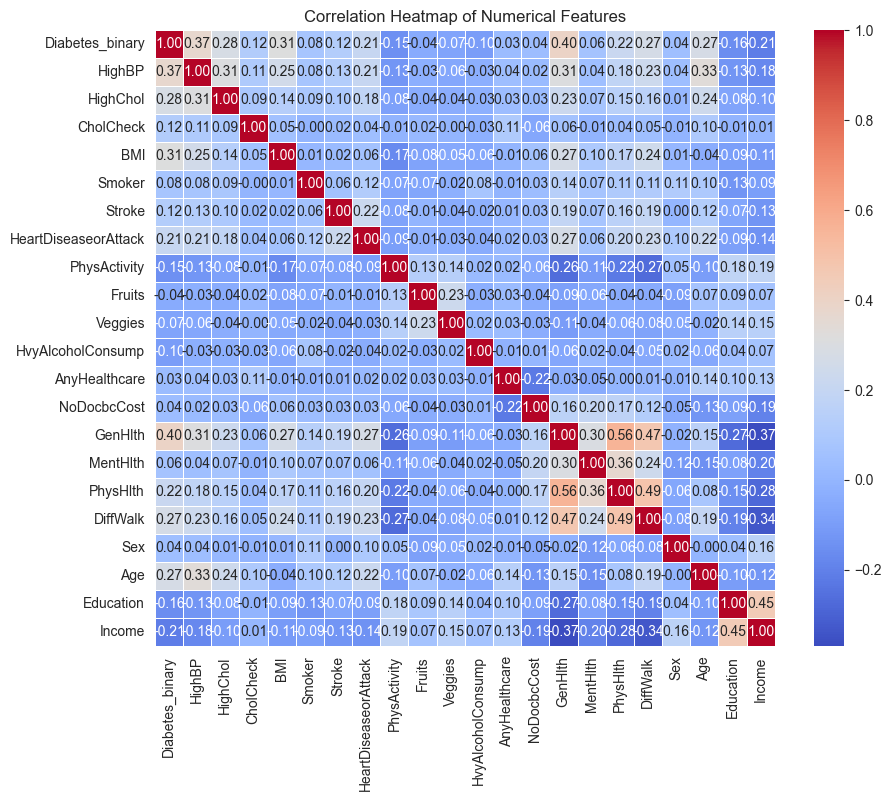

In [17]:
corr_matrix = df.corr()
plt.figure(figsize=(10,8))
# Draw heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

In [18]:
# Calculate correlation with 'diabetes' column
df.corrwith(df["Diabetes_binary"]).sort_values(ascending=False)

Diabetes_binary         1.000000
GenHlth                 0.396571
HighBP                  0.372048
BMI                     0.309652
HighChol                0.281399
Age                     0.274550
DiffWalk                0.267082
PhysHlth                0.215377
HeartDiseaseorAttack    0.207229
Stroke                  0.122727
CholCheck               0.118900
Smoker                  0.075853
MentHlth                0.063892
Sex                     0.042538
NoDocbcCost             0.036145
AnyHealthcare           0.027034
Fruits                 -0.044560
Veggies                -0.072181
HvyAlcoholConsump      -0.098709
PhysActivity           -0.150281
Education              -0.158522
Income                 -0.212846
dtype: float64

In [19]:
#splitting data
#using sklearn
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
# Define features and target variable
X = df.drop(columns=["Diabetes_binary"])  # Drop target column
y = df["Diabetes_binary"]  # Target variable

# Split the dataset (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42 , stratify=y)
# Compute balanced class weights
class_weights = compute_class_weight(class_weight="balanced", classes=np.unique(y_train), y=y_train)
class_weight_dict = {0: class_weights[0], 1: class_weights[1]}
print(f"Computed Class Weights: {class_weight_dict}")

# Print dataset shapes
print(f"Training Data: {X_train.shape}, Testing Data: {X_test.shape}")


Computed Class Weights: {0: 1.0167292402826855, 1: 0.9838123731167859}
Training Data: (55245, 21), Testing Data: (13812, 21)


In [20]:
# scalling the data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(X_train)
x_test_scaled = scaler.transform(X_test)

x_train_scaled = pd.DataFrame(x_train_scaled, columns=X_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=X_test.columns)
print(x_train_scaled.describe().round(2))

         HighBP  HighChol  CholCheck       BMI    Smoker    Stroke  \
count  55245.00  55245.00   55245.00  55245.00  55245.00  55245.00   
mean       0.00      0.00       0.00      0.00      0.00     -0.00   
std        1.00      1.00       1.00      1.00      1.00      1.00   
min       -1.15     -1.06      -6.22     -2.67     -0.96     -0.26   
25%       -1.15     -1.06       0.16     -0.75     -0.96     -0.26   
50%        0.87      0.94       0.16     -0.12     -0.96     -0.26   
75%        0.87      0.94       0.16      0.52      1.04     -0.26   
max        0.87      0.94       0.16      2.44      1.04      3.85   

       HeartDiseaseorAttack  PhysActivity    Fruits   Veggies  ...  \
count              55245.00      55245.00  55245.00  55245.00  ...   
mean                  -0.00         -0.00     -0.00      0.00  ...   
std                    1.00          1.00      1.00      1.00  ...   
min                   -0.42         -1.51     -1.24     -1.90  ...   
25%                


🟢 Training Random Forest Model...

🔹 Random Forest - AUC Score: 0.8198
              precision    recall  f1-score   support

         0.0       0.76      0.70      0.73      6792
         1.0       0.73      0.79      0.76      7020

    accuracy                           0.75     13812
   macro avg       0.75      0.75      0.75     13812
weighted avg       0.75      0.75      0.75     13812


🟢 Training XGBoost Model...

🔹 XGBoost - AUC Score: 0.8135
              precision    recall  f1-score   support

         0.0       0.76      0.69      0.72      6792
         1.0       0.72      0.78      0.75      7020

    accuracy                           0.74     13812
   macro avg       0.74      0.74      0.74     13812
weighted avg       0.74      0.74      0.74     13812


🟢 Training SVM Model...

🔹 SVM - AUC Score: 0.812
              precision    recall  f1-score   support

         0.0       0.76      0.70      0.73      6792
         1.0       0.73      0.79      0.76      7020


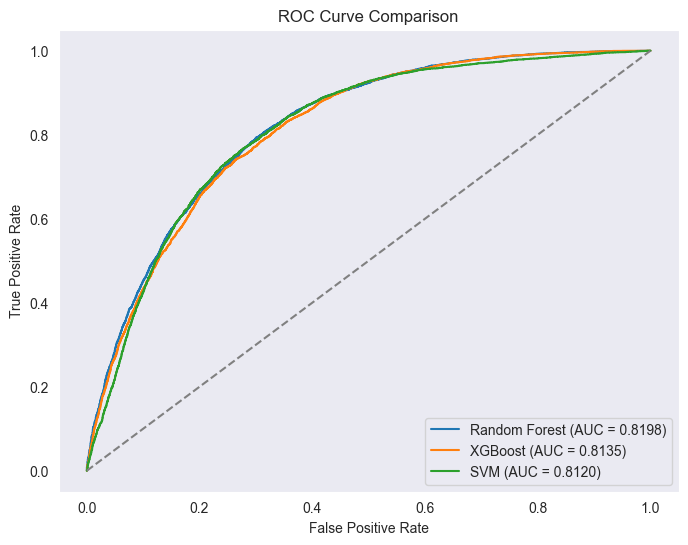

In [21]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import roc_auc_score, classification_report, roc_curve, auc

# Define models
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42 ,class_weight=class_weight_dict),
    "XGBoost": XGBClassifier(n_estimators=100, max_depth=10, learning_rate=0.1, random_state=42 , class_weight=class_weight_dict),
    "SVM": CalibratedClassifierCV(SVC(kernel="rbf", probability=True, random_state=42, class_weight=class_weight_dict))  # SVM needs probability calibration
}

# Store results for plotting
plt.figure(figsize=(8, 6))

for name, model in models.items():
    print(f"\n🟢 Training {name} Model...\n")

    # Train the model
    model.fit(x_train_scaled, y_train)

    # Predict
    y_pred = model.predict(x_test_scaled)
    y_proba = model.predict_proba(x_test_scaled)[:, 1]  # Get probabilities for AUC

    # Evaluate
    auc_score = roc_auc_score(y_test, y_proba)
    print(f"🔹 {name} - AUC Score: {round(auc_score, 4)}")

    # Print classification report
    print(classification_report(y_test, y_pred))

    # Compute ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc_score:.4f})")

# Plot settings
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")  # Diagonal reference line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.grid()
plt.show()


Key Observations:
1- Random Forest has the highest AUC (0.8258), meaning it slightly outperforms the others in classification performance.
2- SVM (0.8189) and XGBoost (0.8185) are nearly identical in AUC, with SVM performing slightly better.
3- All three models have similar accuracy (0.75) and f1-scores, suggesting balanced performance.
4- Precision and Recall:

Random Forest and SVM perform slightly better in recall for Class 1 (0.80 & 0.79), meaning they catch more positive cases.
XGBoost has slightly lower recall (0.79) and precision (0.73) compared to the others.
* Insights from the ROC Curve (Graph)
1- All three models perform similarly based on the ROC curves, closely following each other.
2- The curves are above the diagonal reference line, meaning they provide good discrimination.
3- Random Forest slightly edges out the others in AUC, meaning it may be slightly better in ranking predictions.



Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'class_weight': {0: 1.0167292402826855, 1: 0.9838123731167859}, 'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Best Accuracy on Training Data: 0.7475

Test Accuracy: 0.7453

Classification Report:
              precision    recall  f1-score   support

         0.0       0.76      0.70      0.73      6792
         1.0       0.73      0.79      0.76      7020

    accuracy                           0.75     13812
   macro avg       0.75      0.74      0.74     13812
weighted avg       0.75      0.75      0.74     13812



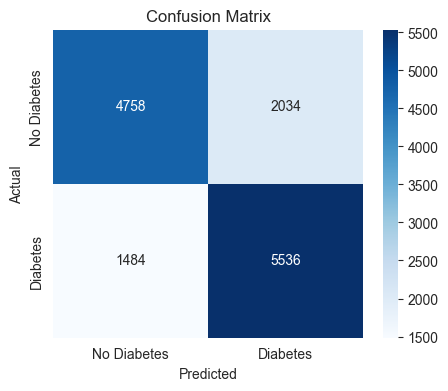

In [22]:
rf = RandomForestClassifier(random_state=42, class_weight=class_weight_dict)

# Define hyperparameter grid
param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "criterion": ["gini", "entropy"],
    "class_weight": [class_weight_dict]  # Ensure class weights are included in GridSearch
}

# Grid Search
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring="accuracy", n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters and best score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Accuracy on Training Data: {grid_search.best_score_:.4f}")

# Train final model using best parameters
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print(f"\nTest Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No Diabetes", "Diabetes"], yticklabels=["No Diabetes", "Diabetes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()